# Bitcoin volatility and covid's  impact. ¿Is Bitcoin a store of value?

In [1]:
# Importing libraries

from bs4 import BeautifulSoup
import pandas as pd
import requests
import datetime as dt
import sys
!{sys.executable} -m pip install matplotlib
import matplotlib.pyplot as plt

# 1. Bitcoin volatility vs EUR/USD Exchange

## Defining Bitcoin DataFrame

In [2]:
# Using get protocol and BeautifulSoup library to scrape over the main table of the website.
# Data ranging from 29th of April of 2013 when bitcoin was still not in a trading market but a P2P one.
# Prices and Market Capitalization are displayed using Euros as base value of comparison
url = 'https://coinmarketcap.com/currencies/bitcoin/historical-data/?start=20130429&end=20200420'
html = requests.get(url).content
html_soup = BeautifulSoup(html, 'html.parser')
bitcoin_data = html_soup.find_all('tr', class_="cmc-table-row")
bitcoin_data_list = []
for element in bitcoin_data:
    lst = element.findAll('td')
    temp_list = []
    for i in lst:
        temp_list.append(i.getText())
    bitcoin_data_list.append(temp_list)


In [3]:
# Setting Date column type to a datetime64 to be able to merge later with the Coronaviruses one.
bitcoin_prices_df = pd.DataFrame(bitcoin_data_list, columns=["Date", "Open", "High", "Low", "Close", "Trans_volume", "Market_cap"])
bitcoin_prices_df.Date = bitcoin_prices_df.Date.astype('datetime64')

bitcoin_prices_df

,Date,Open,High,Low,Close,Trans_volume,Market_cap
0,2020-04-21,"6,879.78","6,934.55","6,834.44","6,880.32","32,589,741,511","126,175,238,603"
1,2020-04-20,"7,186.87","7,240.29","6,835.50","6,881.96","37,747,113,936","126,192,239,912"
2,2020-04-19,"7,260.92","7,280.52","7,167.05","7,189.42","31,311,210,215","131,815,853,850"
3,2020-04-18,"7,092.29","7,269.96","7,089.25","7,257.66","32,447,188,386","133,053,136,876"
4,2020-04-17,"7,116.55","7,167.18","7,050.33","7,096.18","32,513,423,567","130,078,472,088"
...,...,...,...,...,...,...,...
2545,2013-05-03,106.25,108.13,79.10,97.75,0,"1,085,995,169"
2546,2013-05-02,116.38,125.60,92.28,105.21,0,"1,168,517,495"
2547,2013-05-01,139.00,139.89,107.72,116.99,0,"1,298,954,594"
2548,2013-04-30,144.00,146.93,134.05,139.00,0,"1,542,813,125"


In [4]:
#Cleaning values of numeric cells to a single separator
# Using apply, lambda and regex to replace thousand separator commas
bitcoin_prices_df[['Open', 'High', 'Low', 'Close', 'Trans_volume', 'Market_cap']] = bitcoin_prices_df[['Open', 'High',
                'Low', 'Close', 'Trans_volume', 'Market_cap']].apply(lambda x: x.str.replace(',',''))
bitcoin_prices_df.head()

,Date,Open,High,Low,Close,Trans_volume,Market_cap
0,2020-04-21,6879.78,6934.55,6834.44,6880.32,32589741511,126175238603
1,2020-04-20,7186.87,7240.29,6835.50,6881.96,37747113936,126192239912
2,2020-04-19,7260.92,7280.52,7167.05,7189.42,31311210215,131815853850
3,2020-04-18,7092.29,7269.96,7089.25,7257.66,32447188386,133053136876
4,2020-04-17,7116.55,7167.18,7050.33,7096.18,32513423567,130078472088


In [5]:
# Converting the rest of the columns to numeric types
bitcoin_prices_df[['Open', 'High', 'Low', 'Close']] = bitcoin_prices_df[['Open', 'High', 'Low', 
                                                                         'Close']].astype('float64')


bitcoin_prices_df[['Trans_volume', 'Market_cap']] = bitcoin_prices_df[['Trans_volume', 'Market_cap']].astype('int64')

## Importing EUR/DOL Exchange data

In [6]:
eur_dol_ex = pd.read_csv('EURUSD=X.csv')
eur_dol_ex

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-04-22,1.305824,1.308404,1.301800,1.305568,1.305568,0.0
1,2013-04-23,1.305995,1.308216,1.297438,1.306165,1.306165,0.0
2,2013-04-24,1.299376,1.303100,1.296200,1.299444,1.299444,0.0
3,2013-04-25,1.301744,1.309260,1.299326,1.301744,1.301744,0.0
4,2013-04-26,1.300728,1.304631,1.299349,1.300728,1.300728,0.0
...,...,...,...,...,...,...,...
1822,2020-04-15,1.098237,1.098901,1.085765,1.098539,1.098539,0.0
1823,2020-04-16,1.090382,1.090774,1.082966,1.090510,1.090510,0.0
1824,2020-04-17,1.086012,1.089325,1.081268,1.085847,1.085847,0.0
1825,2020-04-20,1.086626,1.089704,1.084305,1.086697,1.086697,0.0


In [7]:
# Transforming date to datetime data type
eur_dol_ex.Date = eur_dol_ex.Date.astype('datetime64')
eur_dol_ex.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume              float64
dtype: object

## Merging EUR/DOL Exchange and Bitcoin prices dataFrames

In [8]:
eur_dol_bitcoin_df = pd.merge(eur_dol_ex, bitcoin_prices_df, on='Date')
eur_dol_bitcoin_df.head()

,Date,Open_x,High_x,Low_x,Close_x,Adj Close,Volume,Open_y,High_y,Low_y,Close_y,Trans_volume,Market_cap
0,2013-04-29,1.304291,1.311527,1.303441,1.304257,1.304257,0.0,134.44,147.49,134.00,144.54,0,1603768865
1,2013-04-30,1.309586,1.318600,1.305977,1.309586,1.309586,0.0,144.00,146.93,134.05,139.00,0,1542813125
2,2013-05-01,1.316898,1.324152,1.316205,1.316829,1.316829,0.0,139.00,139.89,107.72,116.99,0,1298954594
3,2013-05-02,1.318218,1.321701,1.304461,1.318218,1.318218,0.0,116.38,125.60,92.28,105.21,0,1168517495
4,2013-05-03,1.306506,1.315097,1.303747,1.306506,1.306506,0.0,106.25,108.13,79.10,97.75,0,1085995169


In [9]:
## Cleaning data of merged 
eur_dol_bitcoin_df = eur_dol_bitcoin_df.drop(columns=['Volume', 'Adj Close'], axis=1)
eur_dol_bitcoin_df.head()

,Date,Open_x,High_x,Low_x,Close_x,Open_y,High_y,Low_y,Close_y,Trans_volume,Market_cap
0,2013-04-29,1.304291,1.311527,1.303441,1.304257,134.44,147.49,134.00,144.54,0,1603768865
1,2013-04-30,1.309586,1.318600,1.305977,1.309586,144.00,146.93,134.05,139.00,0,1542813125
2,2013-05-01,1.316898,1.324152,1.316205,1.316829,139.00,139.89,107.72,116.99,0,1298954594
3,2013-05-02,1.318218,1.321701,1.304461,1.318218,116.38,125.60,92.28,105.21,0,1168517495
4,2013-05-03,1.306506,1.315097,1.303747,1.306506,106.25,108.13,79.10,97.75,0,1085995169


In [10]:
eur_dol_bitcoin_df

,Date,Open_x,High_x,Low_x,Close_x,Open_y,High_y,Low_y,Close_y,Trans_volume,Market_cap
0,2013-04-29,1.304291,1.311527,1.303441,1.304257,134.44,147.49,134.00,144.54,0,1603768865
1,2013-04-30,1.309586,1.318600,1.305977,1.309586,144.00,146.93,134.05,139.00,0,1542813125
2,2013-05-01,1.316898,1.324152,1.316205,1.316829,139.00,139.89,107.72,116.99,0,1298954594
3,2013-05-02,1.318218,1.321701,1.304461,1.318218,116.38,125.60,92.28,105.21,0,1168517495
4,2013-05-03,1.306506,1.315097,1.303747,1.306506,106.25,108.13,79.10,97.75,0,1085995169
...,...,...,...,...,...,...,...,...,...,...,...
1817,2020-04-15,1.098237,1.098901,1.085765,1.098539,6845.56,6928.66,6633.40,6642.11,32288311031,121731940639
1818,2020-04-16,1.090382,1.090774,1.082966,1.090510,6640.45,7134.45,6555.50,7116.80,46783242377,130445413270
1819,2020-04-17,1.086012,1.089325,1.081268,1.085847,7116.55,7167.18,7050.33,7096.18,32513423567,130078472088
1820,2020-04-20,1.086626,1.089704,1.084305,1.086697,7186.87,7240.29,6835.50,6881.96,37747113936,126192239912


In [11]:
eur_dol_bitcoin_df = eur_dol_bitcoin_df.rename(columns={'Open_x':'Open_EUR_USD','High_x':'High_EUR_USD', 'Low_x':'Low_EUR_USD',
                                  'Close_x':'Close_EUR_USD','Open_y':'Open_BTC_EUR','High_y':'High_BTC_EUR',
                                   'Low_y':'Low_BTC_EUR','Close_y':'Close_BTC_EUR', 'Trans_volume': 'Volume_BTC_EUR',
                                  'Market_cap': 'Market_cap_BTC_EUR'})

In [12]:
# Creating USD/EUR Column
eur_dol_bitcoin_df['Close_USD_EUR'] = (1 / eur_dol_bitcoin_df.Close_EUR_USD)
eur_dol_bitcoin_df

,Date,Open_EUR_USD,High_EUR_USD,Low_EUR_USD,Close_EUR_USD,Open_BTC_EUR,High_BTC_EUR,Low_BTC_EUR,Close_BTC_EUR,Volume_BTC_EUR,Market_cap_BTC_EUR,Close_USD_EUR
0,2013-04-29,1.304291,1.311527,1.303441,1.304257,134.44,147.49,134.00,144.54,0,1603768865,0.766720
1,2013-04-30,1.309586,1.318600,1.305977,1.309586,144.00,146.93,134.05,139.00,0,1542813125,0.763600
2,2013-05-01,1.316898,1.324152,1.316205,1.316829,139.00,139.89,107.72,116.99,0,1298954594,0.759400
3,2013-05-02,1.318218,1.321701,1.304461,1.318218,116.38,125.60,92.28,105.21,0,1168517495,0.758600
4,2013-05-03,1.306506,1.315097,1.303747,1.306506,106.25,108.13,79.10,97.75,0,1085995169,0.765400
...,...,...,...,...,...,...,...,...,...,...,...,...
1817,2020-04-15,1.098237,1.098901,1.085765,1.098539,6845.56,6928.66,6633.40,6642.11,32288311031,121731940639,0.910300
1818,2020-04-16,1.090382,1.090774,1.082966,1.090510,6640.45,7134.45,6555.50,7116.80,46783242377,130445413270,0.917002
1819,2020-04-17,1.086012,1.089325,1.081268,1.085847,7116.55,7167.18,7050.33,7096.18,32513423567,130078472088,0.920940
1820,2020-04-20,1.086626,1.089704,1.084305,1.086697,7186.87,7240.29,6835.50,6881.96,37747113936,126192239912,0.920220


## Comparison of price Volatility

### Volatility by standard deviation from 29 of April of 2013. 

In [13]:
## Using describe to get statistic comparison
eur_dol_bitcoin_df.describe()

,Open_EUR_USD,High_EUR_USD,Low_EUR_USD,Close_EUR_USD,Open_BTC_EUR,High_BTC_EUR,Low_BTC_EUR,Close_BTC_EUR,Volume_BTC_EUR,Market_cap_BTC_EUR,Close_USD_EUR
count,1818.000000,1818.000000,1818.000000,1818.000000,1822.000000,1822.000000,1822.000000,1822.000000,1.822000e+03,1.822000e+03,1818.000000
mean,1.176771,1.180415,1.173037,1.176787,3284.204764,3375.598068,3183.896894,3286.918101,5.410143e+09,5.639635e+10,0.855182
std,0.096892,0.096703,0.097004,0.096888,3835.518429,3958.150496,3691.611827,3836.584801,9.938511e+09,6.735151e+10,0.065893
min,1.039393,1.041992,1.034768,1.039047,76.000000,78.300000,65.530000,68.430000,0.000000e+00,7.784112e+08,0.717830
25%,1.108931,1.111999,1.106085,1.108985,387.520000,396.937500,376.670000,386.497500,2.543598e+07,5.509473e+09,0.810475
50%,1.135937,1.139277,1.132403,1.135989,781.925000,815.245000,770.315000,783.230000,1.115555e+08,1.143453e+10,0.880290
75%,1.233806,1.239111,1.230043,1.233845,6497.255000,6609.790000,6396.640000,6500.902500,5.747323e+09,1.125566e+11,0.901725
max,1.392990,1.399110,1.391260,1.393088,19118.300000,19371.000000,18355.900000,19114.200000,7.415677e+10,3.201743e+11,0.962420


In [14]:
std_differences = abs(eur_dol_bitcoin_df.Close_USD_EUR.std() - eur_dol_bitcoin_df.Close_BTC_EUR.std())
std_differences

3836.5189084206904

Since Bitcoin launched we can se it's standard deviation is huge. In comparison with the Standard Deviation for prices of the EUR/USD Exchange we can se the BTC-EUR volatility is 3836.616782763622 times more than the EUR/DOL for the same time period.

## Price volatility plots

Text(0, 0.5, 'Euros')

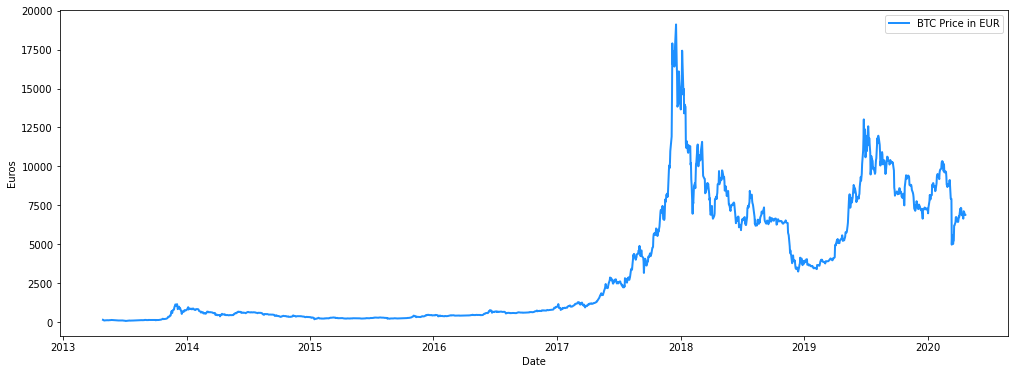

In [15]:
x = eur_dol_bitcoin_df.Date
y = eur_dol_bitcoin_df.Close_BTC_EUR
plt.figure(figsize=(17,6))

plt.plot(x, y, 'dodgerblue', label='BTC Price in EUR', 
         linewidth=2)

plt.legend()
plt.xlabel('Date')
plt.ylabel('Euros')

By the figure above we can se there's a huge distance between the prices. From 2013 to 2017 it kept rather stable, but after 2017 we see an exponential surge and then the data is highly variable.

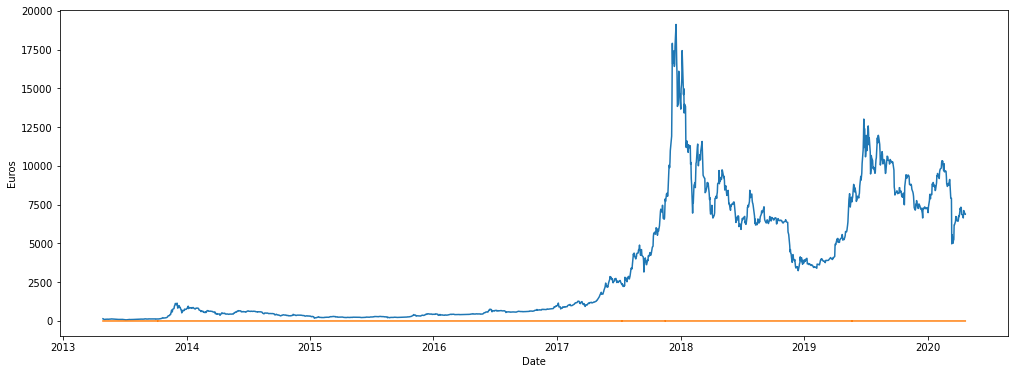

In [16]:
# Comparing BTC/EUR with USD/EUR exchange
plt.figure(figsize=(17,6))
plt.plot(eur_dol_bitcoin_df.Date, eur_dol_bitcoin_df.Close_BTC_EUR, label='BTC/EUR')
plt.xlabel('Date')
plt.ylabel('Euros')
plt.plot(eur_dol_bitcoin_df.Date, eur_dol_bitcoin_df.Close_USD_EUR, label='USD/EUR')


Historically the USD/EUR price has been stable and we can see it keeps its behaviour as a store of value. WHile for bitcoin the data is inconclusive to tell if we can consider it as a store of value.

### YTD Volatility 

In [17]:
# Filtering by date. (Only market days counted)
YTD_BTC_EUR_USD = eur_dol_bitcoin_df[(eur_dol_bitcoin_df['Date'] > '2019-04-20') & 
                                     (eur_dol_bitcoin_df['Date'] < '2020-04-20')]
YTD_BTC_EUR_USD

,Date,Open_EUR_USD,High_EUR_USD,Low_EUR_USD,Close_EUR_USD,Open_BTC_EUR,High_BTC_EUR,Low_BTC_EUR,Close_BTC_EUR,Volume_BTC_EUR,Market_cap_BTC_EUR,Close_USD_EUR
1560,2019-04-22,1.124455,1.126380,1.123671,1.124455,5312.49,5422.69,5280.28,5399.37,14601631648,95354207776,0.889320
1561,2019-04-23,1.125885,1.126126,1.119344,1.125898,5399.37,5633.80,5389.41,5572.36,15867308108,98417387004,0.888180
1562,2019-04-24,1.122448,1.122460,1.118306,1.122435,5571.51,5642.04,5418.26,5464.87,17048033399,96530038144,0.890920
1563,2019-04-25,1.115698,1.116400,1.112174,1.115349,5466.52,5542.24,5181.34,5210.52,15330283408,92046492864,0.896580
1564,2019-04-26,1.113710,1.117281,1.112298,1.113685,5210.30,5383.63,5177.37,5279.35,16812108040,93272287960,0.897920
...,...,...,...,...,...,...,...,...,...,...,...,...
1815,2020-04-13,1.093135,1.096852,1.089360,1.093267,6965.62,6965.62,6668.26,6845.04,38619308647,125422221237,0.914690
1816,2020-04-14,1.091953,1.098394,1.091572,1.092299,6843.28,6958.56,6793.82,6842.43,34110434052,125388687977,0.915500
1817,2020-04-15,1.098237,1.098901,1.085765,1.098539,6845.56,6928.66,6633.40,6642.11,32288311031,121731940639,0.910300
1818,2020-04-16,1.090382,1.090774,1.082966,1.090510,6640.45,7134.45,6555.50,7116.80,46783242377,130445413270,0.917002


In [18]:
# Getting basic statistics
YTD_BTC_EUR_USD.describe()

,Open_EUR_USD,High_EUR_USD,Low_EUR_USD,Close_EUR_USD,Open_BTC_EUR,High_BTC_EUR,Low_BTC_EUR,Close_BTC_EUR,Volume_BTC_EUR,Market_cap_BTC_EUR,Close_USD_EUR
count,259.000000,259.000000,259.000000,259.000000,260.000000,260.000000,260.000000,260.000000,2.600000e+02,2.600000e+02,259.000000
mean,1.109802,1.112422,1.106802,1.109851,8601.377269,8809.847308,8378.708269,8612.432192,2.595568e+10,1.549402e+11,0.901152
std,0.013358,0.013001,0.013740,0.013341,1657.872455,1700.411505,1606.605664,1660.725774,1.062826e+10,2.943488e+10,0.010888
min,1.065848,1.080847,1.065451,1.065735,5002.580000,5311.270000,4106.980000,4970.790000,1.312571e+10,9.080461e+10,0.877170
25%,1.102141,1.104209,1.099330,1.102013,7407.120000,7545.195000,7231.850000,7341.450000,1.753159e+10,1.332651e+11,0.893725
50%,1.110248,1.112223,1.107788,1.110371,8585.270000,8726.325000,8300.155000,8580.485000,2.283057e+10,1.535369e+11,0.900600
75%,1.118843,1.121825,1.116507,1.118912,9820.797500,10100.362500,9611.992500,9799.937500,3.209567e+10,1.765857e+11,0.907430
max,1.140017,1.149584,1.137838,1.140030,13017.120000,13796.490000,12233.260000,13016.230000,7.415677e+10,2.314621e+11,0.938320


## Price Histogram

/usr/local/Cellar/jupyterlab/2.0.1/libexec/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/Cellar/jupyterlab/2.0.1/libexec/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 1.0, 'BTC Price distribution in EUR YTD Analysis')

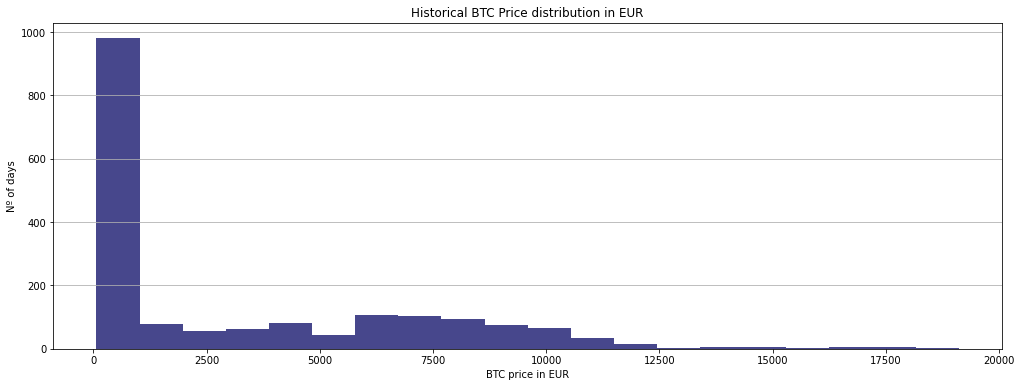

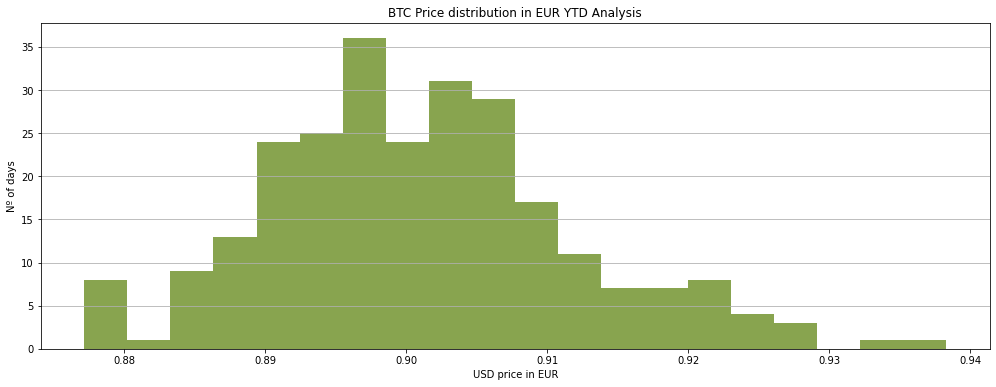

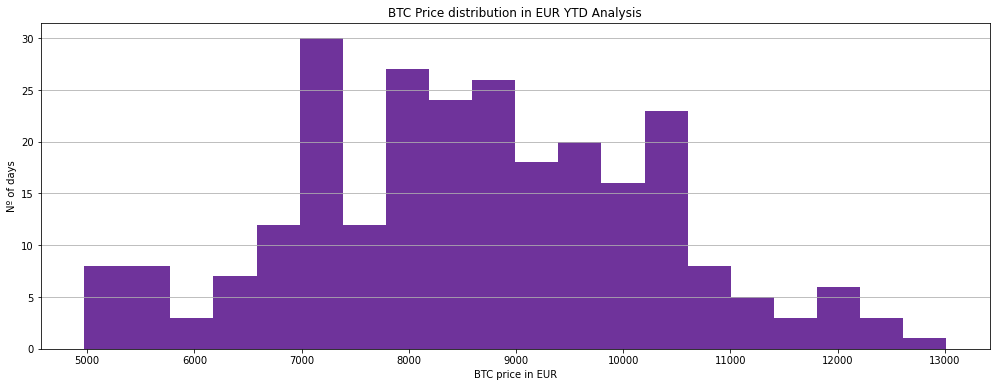

In [19]:
#Historical prices for BTC/EUR histogram
plt.figure(figsize=(17,6))
plt.hist(eur_dol_bitcoin_df.Close_BTC_EUR,
         bins=20,
         histtype='bar',
         color='midnightblue',
         alpha=0.8)
plt.grid(axis='y')
plt.xlabel('BTC price in EUR')
plt.ylabel('Nº of days')
plt.title('Historical BTC Price distribution in EUR')

#YTD BTC/EUR price histogram

plt.figure(figsize=(17,6))
plt.hist(YTD_BTC_EUR_USD.Close_USD_EUR,
         bins=20,
         histtype='bar',
         color='olivedrab',
         alpha=0.8)
plt.grid(axis='y')
plt.xlabel('USD price in EUR')
plt.ylabel('Nº of days')
plt.title('BTC Price distribution in EUR YTD Analysis')

#YTD USD/EUR price histogram

plt.figure(figsize=(17,6))
plt.hist(YTD_BTC_EUR_USD.Close_BTC_EUR,
         bins=20,
         histtype='bar',
         color='indigo',
         alpha=0.8)
plt.grid(axis='y')
plt.xlabel('BTC price in EUR')
plt.ylabel('Nº of days')
plt.title('BTC Price distribution in EUR YTD Analysis')

## YTD BTC/EUR vs YTD USD/EUR

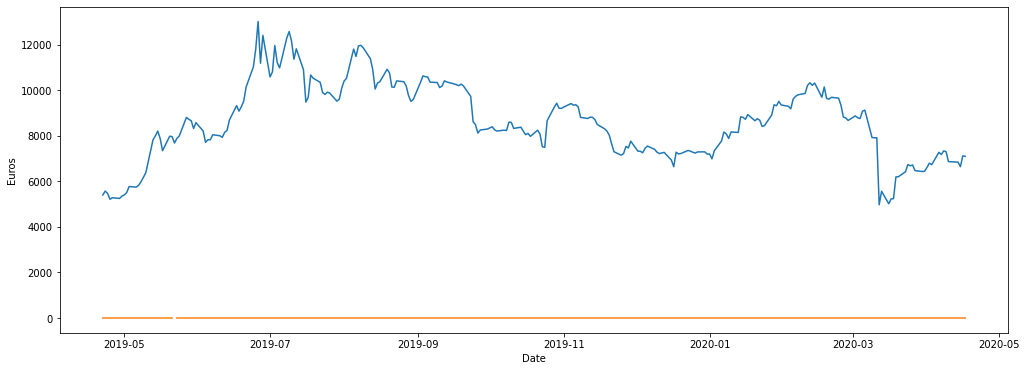

In [38]:
plt.figure(figsize=(17,6))
plt.plot(YTD_BTC_EUR_USD.Date, YTD_BTC_EUR_USD.Close_BTC_EUR, label='BTC/EUR')
plt.xlabel('Date')
plt.ylabel('Euros')
plt.plot(YTD_BTC_EUR_USD.Date, YTD_BTC_EUR_USD.Close_USD_EUR, label='USD/EUR')

# 2. Coronavirus impact on prices and its volatilities

## Global Confirmed Corona Cases

In [20]:
# Reading the csv for confirmed
df = pd.read_csv('time_series_covid19_confirmed_global.csv')
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,521,555,607,665,714,784,840,906,933,996
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,416,433,446,467,475,494,518,539,548,562
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,1761,1825,1914,1983,2070,2160,2268,2418,2534,2629
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,601,601,638,646,659,673,673,696,704,713
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,19,19,19,19,19,19,19,19,24,24


In [21]:
# Selecting the desired rows for EU countries and USA
data_EU_US = df[df['Country/Region'].isin(['Andorra', 'Albania', 'Austria', 'Belarus', 'Belgium', 'Bosnia and Herzegovina',
                                          'Bulgaria', 'Croatia', 'Cyprus', 'Czechia', 'Denmark', 'Estonia', 'Finland', 'France', 
                                          'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Latvia', 'Liechtenstein',
                                          'Lithuania', 'Luxembourg', 'Malta', 'Moldova', 'Monaco', 'Montenegro', 'Netherlands',
                                          'North Macedonia', 'Norway', 'Poland', 'Portugal', 'Romania', 'Russia', 'San Marino',
                                          'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'Ukraine',
                                          'United Kingdom', 'US'])]
data_EU_US

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,416,433,446,467,475,494,518,539,548,562
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,601,601,638,646,659,673,673,696,704,713
16,NaN,Austria,47.5162,14.5501,0,0,0,0,0,0,...,13555,13806,13945,14041,14226,14336,14476,14595,14671,14749
22,NaN,Belarus,53.7098,27.9534,0,0,0,0,0,0,...,1981,2226,2578,2919,3281,3728,4204,4779,4779,4779
23,NaN,Belgium,50.8333,4.0000,0,0,0,0,0,0,...,26667,28018,29647,30589,31119,33573,34809,36138,37183,38496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,British Virgin Islands,United Kingdom,18.4207,-64.6400,0,0,0,0,0,0,...,3,3,3,3,3,3,3,4,4,4
251,Turks and Caicos Islands,United Kingdom,21.6940,-71.7979,0,0,0,0,0,0,...,8,8,9,10,10,10,11,11,11,11
256,"Bonaire, Sint Eustatius and Saba",Netherlands,12.1784,-68.2385,0,0,0,0,0,0,...,2,2,3,3,3,3,3,3,3,5
258,Falkland Islands (Malvinas),United Kingdom,-51.7963,-59.5236,0,0,0,0,0,0,...,5,5,5,5,11,11,11,11,11,11


In [22]:
# Cleaning data: deleting provinces, reset index and deleting index column
df_countries_only = data_EU_US[data_EU_US['Province/State'].isna()]
data_clean = df_countries_only.drop(['Province/State'], axis=1)
df_good = data_clean.reset_index()
del df_good['index']

In [23]:
# Cleaning part 2: Dropping latitue and longitude. 
df_good = df_good.drop(columns=['Lat', 'Long']).set_index("Country/Region")
# Transposing to get a proper time series
df_good = df_good.T.reset_index()
df_good = df_good.rename(columns={'index':'Date'})
# Converting to datetime data type
df_good.Date = df_good.Date.astype('datetime64')
df_good

Country/Region,Date,Albania,Andorra,Austria,Belarus,Belgium,Bosnia and Herzegovina,Bulgaria,Croatia,Cyprus,...,Serbia,Slovakia,Slovenia,Spain,Sweden,Switzerland,Turkey,Ukraine,United Kingdom,US
0,2020-01-22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2020-01-23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2020-01-24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,2020-01-25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,2020-01-26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,2020-04-15,494,673,14336,3728,33573,1110,747,1741,715,...,4873,863,1248,177644,11927,26336,69392,3764,98476,636350
85,2020-04-16,518,673,14476,4204,34809,1167,800,1791,735,...,5318,977,1268,184948,12540,26732,74193,4161,103093,667592
86,2020-04-17,539,696,14595,4779,36138,1214,846,1814,750,...,5690,1049,1304,190839,13216,27078,78546,4662,108692,699706
87,2020-04-18,548,704,14671,4779,37183,1268,878,1832,761,...,5994,1089,1317,191726,13822,27404,82329,5106,114217,732197


In [24]:
# Creating Eurozone column
df_good['Eurozone'] = (df_good['Andorra'] + df_good['Austria'] + df_good['Belgium'] + df_good['Cyprus'] + 
                       df_good['Estonia'] + df_good['Finland'] + df_good['France'] + df_good['Germany'] + 
                       df_good['Greece'] + df_good['Ireland'] + df_good['Italy'] + df_good['Latvia'] + 
                       df_good['Liechtenstein'] + df_good['Lithuania'] + df_good['Luxembourg'] + 
                       df_good['Malta'] + df_good['Monaco'] + df_good['Montenegro'] + 
                       df_good['Netherlands'] + df_good['Portugal'] + df_good['San Marino'] +
                       df_good['Slovakia'] + df_good['Slovenia'] + df_good['Spain'])
df_good

Country/Region,Date,Albania,Andorra,Austria,Belarus,Belgium,Bosnia and Herzegovina,Bulgaria,Croatia,Cyprus,...,Slovakia,Slovenia,Spain,Sweden,Switzerland,Turkey,Ukraine,United Kingdom,US,Eurozone
0,2020-01-22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2020-01-23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2020-01-24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,2
3,2020-01-25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,3
4,2020-01-26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,2020-04-15,494,673,14336,3728,33573,1110,747,1741,715,...,863,1248,177644,11927,26336,69392,3764,98476,636350,734411
85,2020-04-16,518,673,14476,4204,34809,1167,800,1791,735,...,977,1268,184948,12540,26732,74193,4161,103093,667592,765381
86,2020-04-17,539,696,14595,4779,36138,1214,846,1814,750,...,1049,1304,190839,13216,27078,78546,4662,108692,699706,784438
87,2020-04-18,548,704,14671,4779,37183,1268,878,1832,761,...,1089,1317,191726,13822,27404,82329,5106,114217,732197,794996


In [25]:
#keeping the columns that we are interested in
confirmed_final = df_good[['Date','US','Eurozone' ]]
confirmed_final


Country/Region,Date,US,Eurozone
0,2020-01-22,1,0
1,2020-01-23,1,0
2,2020-01-24,2,2
3,2020-01-25,2,3
4,2020-01-26,5,3
...,...,...,...
84,2020-04-15,636350,734411
85,2020-04-16,667592,765381
86,2020-04-17,699706,784438
87,2020-04-18,732197,794996


## Confirmed Global deaths by COVID19

In [26]:
# Importing data
df_d = pd.read_csv('time_series_covid19_deaths_global.csv')

In [27]:
#Cleaning the data by countries
data_EU_US_d = df_d[df_d['Country/Region'].isin(['Andorra', 'Albania', 'Austria', 'Belarus', 'Belgium', 'Bosnia and Herzegovina',
                                          'Bulgaria', 'Croatia', 'Cyprus', 'Czechia', 'Denmark', 'Estonia', 'Finland', 'France', 
                                          'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Latvia', 'Liechtenstein',
                                          'Lithuania', 'Luxembourg', 'Malta', 'Moldova', 'Monaco', 'Montenegro', 'Netherlands',
                                          'North Macedonia', 'Norway', 'Poland', 'Portugal', 'Romania', 'Russia', 'San Marino',
                                          'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'Ukraine',
                                          'United Kingdom', 'US'])]

# Cleaning all the provinces and states and dropping
df_countries_only_d = data_EU_US_d[data_EU_US_d['Province/State'].isna()]
data_clean_d = df_countries_only_d.drop(['Province/State'], axis=1)

In [28]:
# Reseting index
df_good_d = data_clean_d.reset_index()
del df_good_d['index']
df_good_d
# Cleaning Lat and Long
df_good_d = df_good_d.drop(columns=['Lat', 'Long']).set_index("Country/Region")
# Transposing
df_good_d = df_good_d.T.reset_index()
df_good_d = df_good_d.rename(columns={'index':'Date'})
#Changing data type 
df_good_d.Date = df_good_d.Date.astype('datetime64')
df_good_d.head()

Country/Region,Date,Albania,Andorra,Austria,Belarus,Belgium,Bosnia and Herzegovina,Bulgaria,Croatia,Cyprus,...,Serbia,Slovakia,Slovenia,Spain,Sweden,Switzerland,Turkey,Ukraine,United Kingdom,US
0,2020-01-22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020-01-23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2020-01-24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2020-01-25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2020-01-26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
# Creating Eurozone column
df_good_d['Eurozone_d'] = (df_good_d['Andorra'] + df_good_d['Austria'] + df_good_d['Belgium'] + df_good_d['Cyprus'] + df_good_d['Estonia'] +
                 df_good_d['Finland'] + df_good_d['France'] + df_good_d['Germany'] + df_good_d['Greece'] + df_good_d['Ireland'] + 
                 df_good_d['Italy'] + df_good_d['Latvia'] + df_good_d['Liechtenstein'] + df_good_d['Lithuania'] + df_good_d['Luxembourg'] + 
                 df_good_d['Malta'] + df_good_d['Monaco'] + df_good_d['Montenegro'] + df_good_d['Netherlands'] + df_good_d['Portugal'] + 
                 df_good_d['San Marino'] + df_good_d['Slovakia'] + df_good_d['Slovenia'] + df_good_d['Spain'])
df_good_d

Country/Region,Date,Albania,Andorra,Austria,Belarus,Belgium,Bosnia and Herzegovina,Bulgaria,Croatia,Cyprus,...,Slovakia,Slovenia,Spain,Sweden,Switzerland,Turkey,Ukraine,United Kingdom,US,Eurozone_d
0,2020-01-22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020-01-23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2020-01-24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2020-01-25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2020-01-26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,2020-04-15,25,33,393,36,4440,41,36,33,12,...,6,61,18708,1203,1239,1518,108,12868,28325,70806
85,2020-04-16,26,33,410,40,4857,43,38,35,12,...,8,61,19315,1333,1281,1643,116,13729,32916,73639
86,2020-04-17,26,35,431,42,5163,46,41,36,12,...,9,66,20002,1400,1327,1769,125,14576,36773,76531
87,2020-04-18,26,35,443,45,5453,47,41,39,12,...,11,70,20043,1511,1368,1890,133,15464,38664,78334


In [30]:
#changeing the column name so there's no confusion between tables
df_good_d = df_good_d.rename(columns={'US':'US_d'})

In [31]:
#keeping the columns that we are interested in
d_final = df_good_d[['Date','US_d','Eurozone_d' ]]
d_final

Country/Region,Date,US_d,Eurozone_d
0,2020-01-22,0,0
1,2020-01-23,0,0
2,2020-01-24,0,0
3,2020-01-25,0,0
4,2020-01-26,0,0
...,...,...,...
84,2020-04-15,28325,70806
85,2020-04-16,32916,73639
86,2020-04-17,36773,76531
87,2020-04-18,38664,78334


In [32]:
#merging the two datasets on Date to be able to merge them to the Bitcoin dataset
covid_df = pd.merge(confirmed_final, d_final, on='Date')
covid_df

Country/Region,Date,US,Eurozone,US_d,Eurozone_d
0,2020-01-22,1,0,0,0
1,2020-01-23,1,0,0,0
2,2020-01-24,2,2,0,0
3,2020-01-25,2,3,0,0
4,2020-01-26,5,3,0,0
...,...,...,...,...,...
84,2020-04-15,636350,734411,28325,70806
85,2020-04-16,667592,765381,32916,73639
86,2020-04-17,699706,784438,36773,76531
87,2020-04-18,732197,794996,38664,78334


In [33]:
#Merging covid and bitcoin datasets with an outer join to have all the days 
#(markets are closed on weekends and corona is only been with us since january fortunately)
covid_impact_df = pd.merge(covid_df, eur_dol_bitcoin_df, how='outer', on='Date')
covid_impact_df

,Date,US,Eurozone,US_d,Eurozone_d,Open_EUR_USD,High_EUR_USD,Low_EUR_USD,Close_EUR_USD,Open_BTC_EUR,High_BTC_EUR,Low_BTC_EUR,Close_BTC_EUR,Volume_BTC_EUR,Market_cap_BTC_EUR,Close_USD_EUR
0,2020-01-22,1.0,0.0,0.0,0.0,1.108586,1.109779,1.107162,1.108561,8744.21,8792.99,8636.75,8680.88,2.260020e+10,1.577833e+11,0.90207
1,2020-01-23,1.0,0.0,0.0,0.0,1.109755,1.110322,1.103704,1.109644,8680.65,8687.75,8333.64,8406.52,2.577068e+10,1.528133e+11,0.90119
2,2020-01-24,2.0,2.0,0.0,0.0,1.105534,1.106085,1.102123,1.105522,8405.57,8514.67,8266.84,8445.43,2.439791e+10,1.535368e+11,0.90455
3,2020-01-25,2.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-26,5.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1843,2020-01-17,NaN,NaN,NaN,NaN,1.113800,1.114500,1.108758,1.113958,8725.21,8958.12,8677.32,8929.04,3.637214e+10,1.622111e+11,0.89770
1844,2020-01-20,NaN,NaN,NaN,NaN,1.109521,1.110494,1.107751,1.109459,8704.63,8745.59,8560.47,8657.64,2.642238e+10,1.573276e+11,0.90134
1845,2020-01-21,NaN,NaN,NaN,NaN,1.109644,1.111976,1.108647,1.109693,8658.99,8755.71,8544.52,8745.89,2.409742e+10,1.589480e+11,0.90115
1846,2020-04-20,NaN,NaN,NaN,NaN,1.086626,1.089704,1.084305,1.086697,7186.87,7240.29,6835.50,6881.96,3.774711e+10,1.261922e+11,0.92022


In [47]:
#we sort the values by date
covid_impact_df = covid_impact_df.sort_values(by='Date', ascending=True)

In [48]:
# Filtering by date. 
YTD_covid_impact_df = covid_impact_df[(covid_impact_df['Date'] > '2019-04-20') & 
                                     (covid_impact_df['Date'] < '2020-04-20')]
YTD_covid_impact_df

,Date,US,Eurozone,US_d,Eurozone_d,Open_EUR_USD,High_EUR_USD,Low_EUR_USD,Close_EUR_USD,Open_BTC_EUR,High_BTC_EUR,Low_BTC_EUR,Close_BTC_EUR,Volume_BTC_EUR,Market_cap_BTC_EUR,Close_USD_EUR
1649,2019-04-22,NaN,NaN,NaN,NaN,1.124455,1.126380,1.123671,1.124455,5312.49,5422.69,5280.28,5399.37,1.460163e+10,9.535421e+10,0.889320
1650,2019-04-23,NaN,NaN,NaN,NaN,1.125885,1.126126,1.119344,1.125898,5399.37,5633.80,5389.41,5572.36,1.586731e+10,9.841739e+10,0.888180
1651,2019-04-24,NaN,NaN,NaN,NaN,1.122448,1.122460,1.118306,1.122435,5571.51,5642.04,5418.26,5464.87,1.704803e+10,9.653004e+10,0.890920
1652,2019-04-25,NaN,NaN,NaN,NaN,1.115698,1.116400,1.112174,1.115349,5466.52,5542.24,5181.34,5210.52,1.533028e+10,9.204649e+10,0.896580
1653,2019-04-26,NaN,NaN,NaN,NaN,1.113710,1.117281,1.112298,1.113685,5210.30,5383.63,5177.37,5279.35,1.681211e+10,9.327229e+10,0.897920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,2020-04-15,636350.0,734411.0,28325.0,70806.0,1.098237,1.098901,1.085765,1.098539,6845.56,6928.66,6633.40,6642.11,3.228831e+10,1.217319e+11,0.910300
85,2020-04-16,667592.0,765381.0,32916.0,73639.0,1.090382,1.090774,1.082966,1.090510,6640.45,7134.45,6555.50,7116.80,4.678324e+10,1.304454e+11,0.917002
86,2020-04-17,699706.0,784438.0,36773.0,76531.0,1.086012,1.089325,1.081268,1.085847,7116.55,7167.18,7050.33,7096.18,3.251342e+10,1.300785e+11,0.920940
87,2020-04-18,732197.0,794996.0,38664.0,78334.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Correlation Matrix

In [63]:
coor_mat = YTD_covid_impact_df.corr()
coor_mat

,US,Eurozone,US_d,Eurozone_d,Open_EUR_USD,High_EUR_USD,Low_EUR_USD,Close_EUR_USD,Open_BTC_EUR,High_BTC_EUR,Low_BTC_EUR,Close_BTC_EUR,Volume_BTC_EUR,Market_cap_BTC_EUR,Close_USD_EUR
US,1.000000,0.975469,0.973699,0.994611,-0.255153,-0.265904,-0.285316,-0.254225,-0.412834,-0.443637,-0.368204,-0.403614,-0.093420,-0.398028,0.251837
Eurozone,0.975469,1.000000,0.910387,0.992878,-0.279728,-0.276759,-0.335372,-0.278026,-0.540034,-0.567826,-0.486545,-0.522099,-0.057420,-0.516622,0.276251
US_d,0.973699,0.910387,1.000000,0.949239,-0.224049,-0.239801,-0.245938,-0.223659,-0.338242,-0.367778,-0.301202,-0.332762,-0.104497,-0.327470,0.221305
Eurozone_d,0.994611,0.992878,0.949239,1.000000,-0.269567,-0.273968,-0.311426,-0.268295,-0.473284,-0.503041,-0.424390,-0.460287,-0.076988,-0.454714,0.266183
Open_EUR_USD,-0.255153,-0.279728,-0.224049,-0.269567,1.000000,0.978877,0.971993,0.999881,0.149241,0.174625,0.121170,0.152882,-0.313301,0.121077,-0.999753
High_EUR_USD,-0.265904,-0.276759,-0.239801,-0.273968,0.978877,1.000000,0.962038,0.978803,0.121739,0.149129,0.092040,0.125889,-0.266149,0.094890,-0.977380
Low_EUR_USD,-0.285316,-0.335372,-0.245938,-0.311426,0.971993,0.962038,1.000000,0.970904,0.198788,0.218170,0.180043,0.204791,-0.381403,0.171806,-0.970674
Close_EUR_USD,-0.254225,-0.278026,-0.223659,-0.268295,0.999881,0.978803,0.970904,1.000000,0.148326,0.174305,0.120520,0.152756,-0.311546,0.120984,-0.999844
Open_BTC_EUR,-0.412834,-0.540034,-0.338242,-0.473284,0.149241,0.121739,0.198788,0.148326,1.000000,0.987946,0.981316,0.970092,-0.119653,0.969026,-0.147352
High_BTC_EUR,-0.443637,-0.567826,-0.367778,-0.503041,0.174625,0.149129,0.218170,0.174305,0.987946,1.000000,0.975427,0.984911,-0.075625,0.982804,-0.172558


## Scatterplots for correlation between COVID-19 Contagions and BTC/EUR exchange and USD/EUR exchange

Text(0.5, 1.0, 'COVID-19 impact on BTC/EUR exchange')

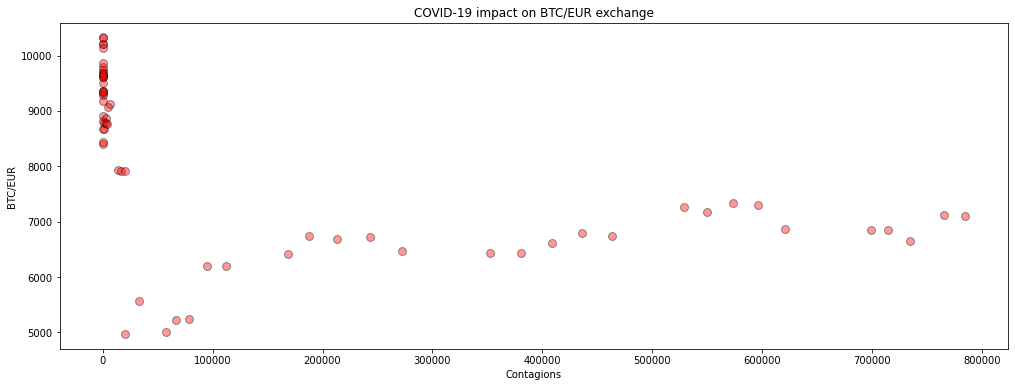

In [82]:
## COVID-19 vs BTC/EUR
plt.figure(figsize=(17,6))
plt.scatter(YTD_covid_impact_df.Eurozone, YTD_covid_impact_df.Close_BTC_EUR, label='BTC/EUR', s = 250,
            color='red',edgecolor='black',alpha=0.4, marker=".")
plt.xlabel('Contagions')
plt.ylabel('BTC/EUR')
plt.title('COVID-19 impact on BTC/EUR exchange')


Text(0, 0.5, 'USD/EUR')

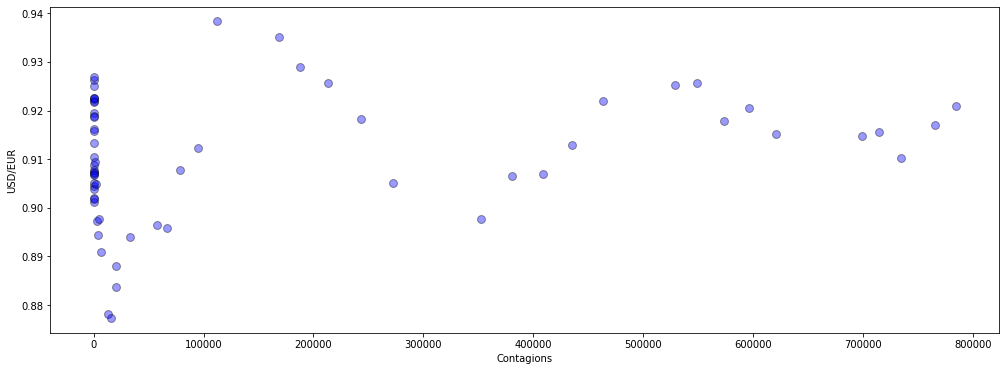

In [81]:
## COVID-19 vs USD/EUR
plt.figure(figsize=(17,6))
plt.scatter(YTD_covid_impact_df.Eurozone, YTD_covid_impact_df.Close_USD_EUR, label='USD/EUR', s = 250,
            color='blue',edgecolor='black',alpha=0.4, marker=".")
plt.xlabel('Contagions')
plt.ylabel('USD/EUR')

Form this graphics we can see that the impact of the COVID-19 number of contagions in the Eurozone is much greater in the USD/EUR exchange than in the BTC/EUR one. 

We got to this conclusion because we can see much more variation in relative terms on the second graph than in the first (The quantities of variation are still greater in the bitcoin market as we saw before is a more volatile market, but USD/EUR relatively is affected 